In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from seaborn import kdeplot
import nbconvert as nb
import nbformat

In [11]:
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', date_parser='date')
covid = data.loc[:,['location','date','new_cases']]
covid.set_index('location', inplace=True)
covid.dropna()
covid.loc[['Argentina','Colombia','Chile','Russia','Spain'],:]
c_averages = covid.groupby(['date']).mean()
c_averages


,new_cases
date,
2019-12-31,0.794118
2020-01-01,0.000000
2020-01-02,0.000000
2020-01-03,0.500000
2020-01-04,0.000000
...,...
2020-08-23,2537.761905
2020-08-24,2138.066667
2020-08-25,2098.638095


In [12]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39899,NaN,NaN,International,2020-08-23,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39900,NaN,NaN,International,2020-08-24,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39901,NaN,NaN,International,2020-08-25,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39902,NaN,NaN,International,2020-08-26,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
covid

,date,new_cases
location,,
Afghanistan,2019-12-31,0.0
Afghanistan,2020-01-01,0.0
Afghanistan,2020-01-02,0.0
Afghanistan,2020-01-03,0.0
Afghanistan,2020-01-04,0.0
...,...,...
International,2020-08-23,NaN
International,2020-08-24,NaN
International,2020-08-25,NaN


In [14]:
arg = covid.loc[["Argentina"],:]
arg

,date,new_cases
location,,
Argentina,2020-02-11,NaN
Argentina,2020-02-12,NaN
Argentina,2020-02-13,NaN
Argentina,2020-02-14,NaN
Argentina,2020-02-15,NaN
...,...,...
Argentina,2020-08-23,8159.0
Argentina,2020-08-24,7759.0
Argentina,2020-08-25,14065.0


In [15]:
argentina = arg.dropna()
argentina

,date,new_cases
location,,
Argentina,2020-03-04,1.0
Argentina,2020-03-06,1.0
Argentina,2020-03-07,6.0
Argentina,2020-03-08,1.0
Argentina,2020-03-09,3.0
...,...,...
Argentina,2020-08-23,8159.0
Argentina,2020-08-24,7759.0
Argentina,2020-08-25,14065.0


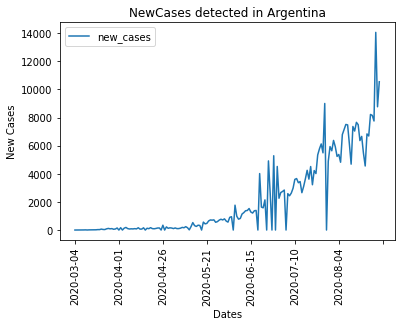

In [16]:
graph_arg = argentina.set_index('date').plot(rot=90)
plt.title('NewCases detected in Argentina')
plt.xlabel('Dates')
plt.ylabel('New Cases')
plt.show()

graph_arg

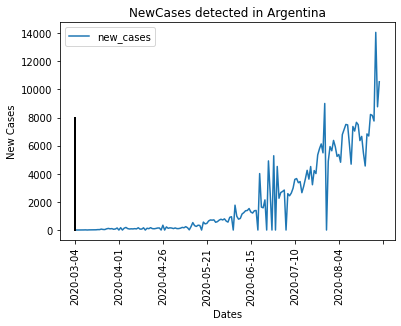

In [17]:
graph_arg = argentina.set_index('date').plot(rot=90)
plt.plot(['5000','5000'], [0,8000], 'k-', lw=2)
plt.title('NewCases detected in Argentina')
plt.xlabel('Dates')
plt.ylabel('New Cases')
plt.show()
graph_arg

In [18]:
c_averages

,new_cases
date,
2019-12-31,0.794118
2020-01-01,0.000000
2020-01-02,0.000000
2020-01-03,0.500000
2020-01-04,0.000000
...,...
2020-08-23,2537.761905
2020-08-24,2138.066667
2020-08-25,2098.638095


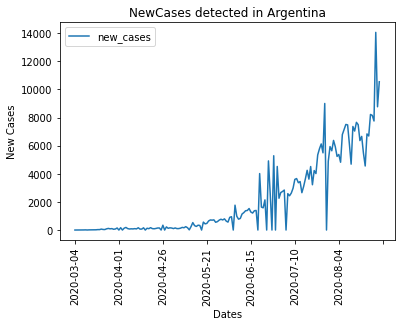

In [19]:
graph_los5 = argentina.set_index('date').plot(rot=90)
plt.title('NewCases detected in Argentina')
plt.xlabel('Dates')
plt.ylabel('New Cases')
plt.show()

graph_arg